## Working with Data & a Real Cost Function
### Mean Squared Error(MSE): a cost function for regression problems
### $$ RSS = \sum_{i=1}^{n} (y^{(i)} - h_\theta x^{(i)} )^2 $$
where $h_\theta x^{(i)}$ is $\theta_0 + \theta_1 \cdot x$ which is the predicted value
### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y^{(i)} - h_\theta x^{(i)} )^2 $$ or $$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y - \hat{y} )^2 $$
where $\hat{y}$ is the predicted value<br>

### Why MSE better than RSS?

When we deal with large dataset, the RSS can be really large and it may overflow.<br>
By dividing the number of samples, we can prevent the overflow issue.

### Importing Packages

In [105]:
#import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm # color map
#from mpl_toolkits import mplot3d # 3D plot required library
#from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

### Transposing and Reshaping Arrays

Preparing input data

In [106]:
# In order to use linear Regression function, a 2D input is required

x = np.array([0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]) # This is 1 dimensional input
y = np.array([[1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]]) # This is 2D but wrong format

print('Shape of array x:', x.shape)
print('Shape of array y:', y.shape)

x = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose() 
y = np.array([[1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]]).reshape(7,1) # you can use transpose or reshape, and they both work

print('Shape of array x:', x.shape)
print('Shape of array y:', y.shape)


Shape of array x: (7,)
Shape of array y: (1, 7)
Shape of array x: (7, 1)
Shape of array y: (7, 1)


In [107]:
# Quick linear Regression
regr = LinearRegression()
regr.fit(x, y)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])
print('Predicted value:\n',regr.predict(x))

Theta 0: 0.8475351486029554
Theta 1: 1.222726463783591
Predicted value:
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]


### Plotting and Observe the Actual values and Predicted Values

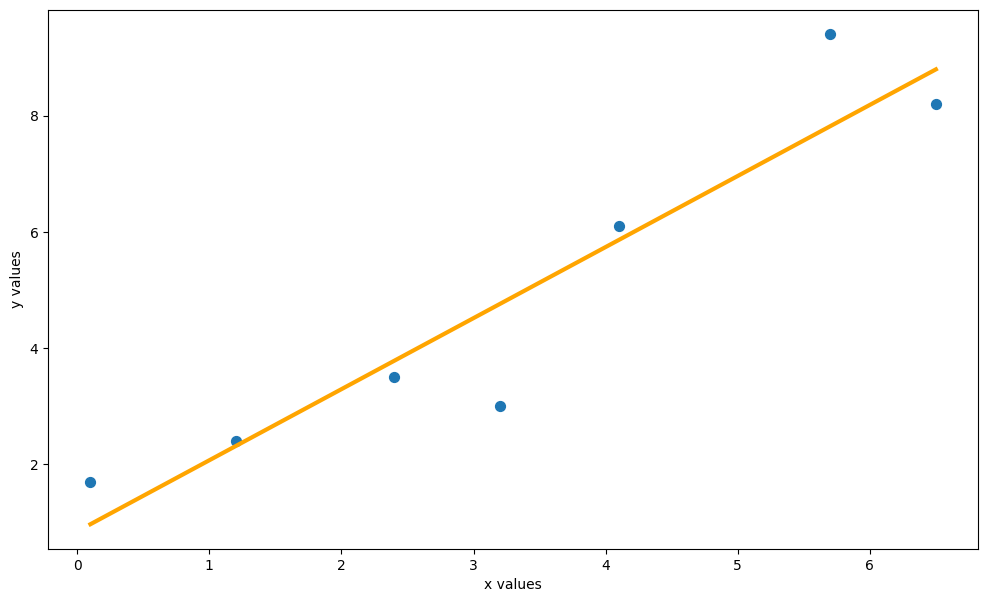

In [108]:
plt.figure(figsize=(12,7))
plt.scatter(x,y,s=50) # Plot input data
plt.plot(x,regr.predict(x),color='orange', linewidth=3) # plot predict regression linear function
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [109]:
# y_hat = theta0 + theta1 * x
y_hat = 0.847535148603 + 1.22272646378 * x
print('Predicted value y_hat are: \n', y_hat)
print('In comparision, the actual y values are \n', y)

Predicted value y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparision, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


### Python Function mse(y, y_hat) Return the MSE
**Manual Calculation:**

In [110]:
def mse(y, y_hat):
    #mse_calc = (1/y.size) * sum((y - y_hat) ** 2)
    # Alternative way
    mse_calc = np.average((y-y_hat) ** 2, axis = 0) # axis = 0 means average the rows, not column

    return mse_calc

print('Manually calculated MSE is:',mse(y, y_hat))

Manually calculated MSE is: [0.94796558]


**Using in-build Sklearn function:**

In [111]:
print('Sklearn in-build calculated MSE is:', mean_squared_error(y, y_hat))

Sklearn in-build calculated MSE is: 0.947965575979458


In [112]:
print('MSE regression is:', mean_squared_error(y, regr.predict(x)))

MSE regression is: 0.9479655759794575


## 3D Plot for the MSE Cost Function

### Make Data for Thetas

Understanding Meshgrid:

In [113]:
th_0 = np.linspace(start = -1, stop = 3, num = 5)
th_1 = np.linspace(start = -1, stop = 3, num = 10)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)
print('plot_t0 shape is:', plot_t0.shape)
print('plot_t1 shape is:', plot_t1.shape)
print('plot_t0 is: \n', plot_t0)
print('plot_t1 is: \n', plot_t1)

plot_t0 shape is: (10, 5)
plot_t1 shape is: (10, 5)
plot_t0 is: 
 [[-1.  0.  1.  2.  3.]
 [-1.  0.  1.  2.  3.]
 [-1.  0.  1.  2.  3.]
 [-1.  0.  1.  2.  3.]
 [-1.  0.  1.  2.  3.]
 [-1.  0.  1.  2.  3.]
 [-1.  0.  1.  2.  3.]
 [-1.  0.  1.  2.  3.]
 [-1.  0.  1.  2.  3.]
 [-1.  0.  1.  2.  3.]]
plot_t1 is: 
 [[-1.         -1.         -1.         -1.         -1.        ]
 [-0.55555556 -0.55555556 -0.55555556 -0.55555556 -0.55555556]
 [-0.11111111 -0.11111111 -0.11111111 -0.11111111 -0.11111111]
 [ 0.33333333  0.33333333  0.33333333  0.33333333  0.33333333]
 [ 0.77777778  0.77777778  0.77777778  0.77777778  0.77777778]
 [ 1.22222222  1.22222222  1.22222222  1.22222222  1.22222222]
 [ 1.66666667  1.66666667  1.66666667  1.66666667  1.66666667]
 [ 2.11111111  2.11111111  2.11111111  2.11111111  2.11111111]
 [ 2.55555556  2.55555556  2.55555556  2.55555556  2.55555556]
 [ 3.          3.          3.          3.          3.        ]]


In [114]:
num_thetas = 200
th_0 = np.linspace(start = -1, stop = 3, num = num_thetas)
th_1 = np.linspace(start = -1, stop = 3, num = num_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

### Calc MSE using nested for loops

In [115]:
plot_cost = np.zeros((num_thetas,num_thetas))

for i in range(num_thetas):
    for j in range(num_thetas):
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x
        plot_cost[i][j] = mse(y, y_hat)

print('Shape of plot_cost:',plot_cost.shape)

Shape of plot_cost: (200, 200)


### Plotting MSE

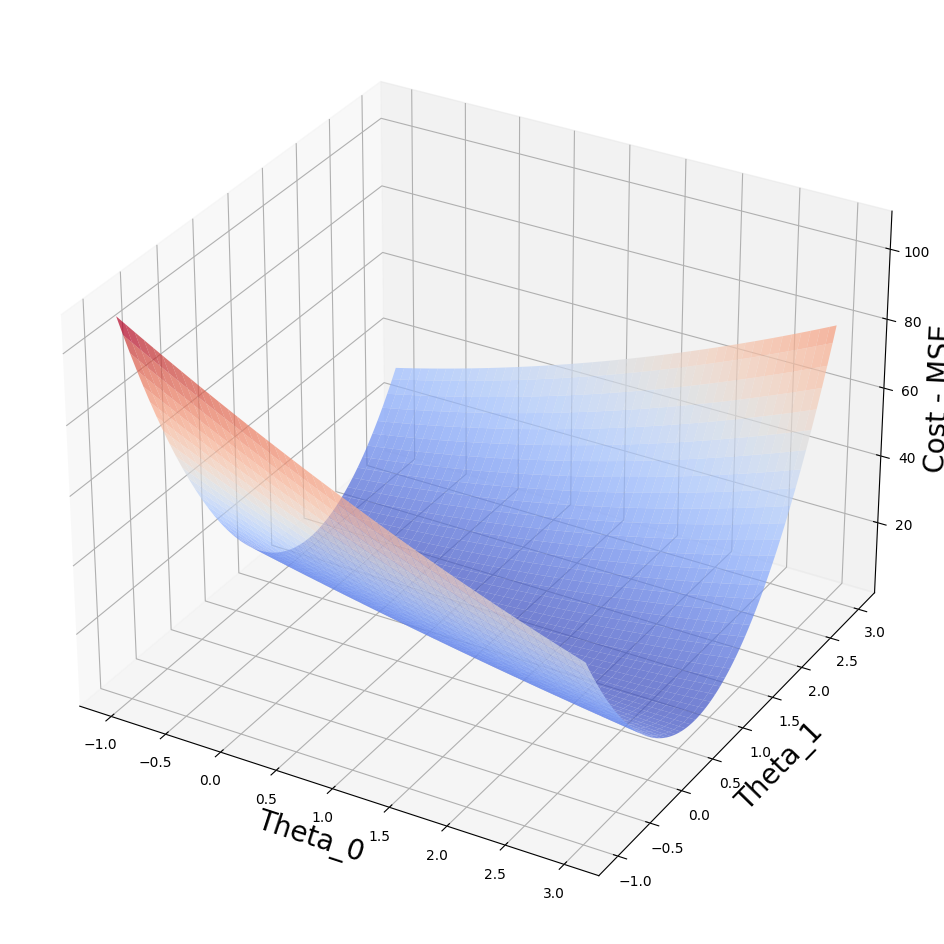

In [116]:
fig = plt. figure(figsize=[16,12])
ax = plt.axes(projection = '3d')

ax.set_xlabel('Theta_0', fontsize = 20)
ax.set_ylabel('Theta_1', fontsize = 20)
ax.set_zlabel('Cost - MSE', fontsize = 20)

ax.plot_surface(plot_t0,plot_t1,plot_cost, cmap = cm.coolwarm, alpha = 0.7)
plt.show()

In [117]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices= plot_cost.argmin(), shape=plot_cost.shape)
print('Min occurs at (i,j)', ij_min)
print('Min MSE for Theta_0 at plot_t0[111][91]', plot_t0[111][91])
print('Min MSE for Theta_1 at plot_t1[111][91]', plot_t1[111][91])

Min value of plot_cost 0.9483826526747164
Min occurs at (i,j) (111, 91)
Min MSE for Theta_0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta_1 at plot_t1[111][91] 1.2311557788944723
